In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score, silhouette_score, homogeneity_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


KMeans
NMI:0.47
ARI:0.57
Silhouette: 0.48
Homogeneity: 0.47

AgglomerativeClustering
NMI:0.76
ARI:0.81
Silhouette: 0.43
Homogeneity: 0.76

DBSCAN
NMI:1.00
ARI:1.00
Silhouette: 0.38
Homogeneity: 1.00



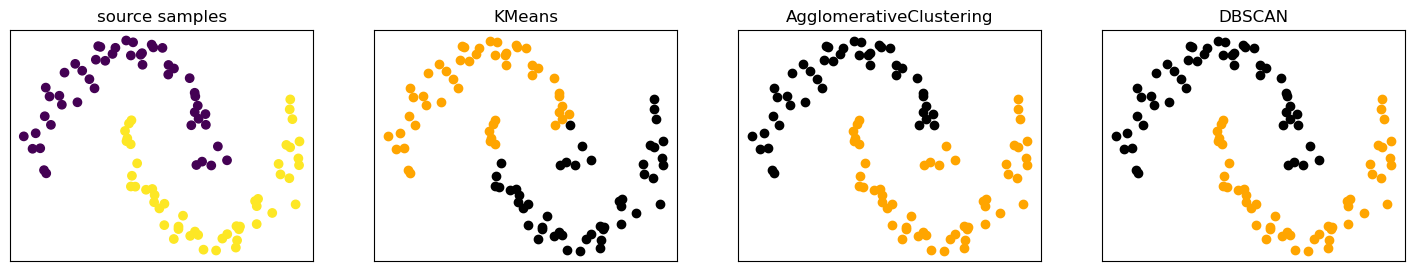

In [19]:
NUM_CLASSES = 2 
colors = ['black', 'orange', 'blue', 'magenta', 'cyan', 'darkgray']

X,y = make_moons(n_samples=100,noise=0.08, random_state=10)
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

cluster_methods = (KMeans(n_clusters=NUM_CLASSES), AgglomerativeClustering(n_clusters=NUM_CLASSES),
                   DBSCAN(eps=.14, min_samples=3))

fig, axs = plt.subplots(1,4, figsize=(18,3), 
                        subplot_kw={'xticks':(), 'yticks':()})
axs[0].scatter(X[:,0], X[:,1], c = y)
axs[0].set_title('source samples')

for f, cluster_method, ax in zip(range(3), cluster_methods, axs):
    clusters = cluster_method.fit_predict(X)

    for i in range(len(clusters)):
        color = colors[clusters[i]]
        axs[f+1].scatter(X[i,0],X[i,1], c = color)
    axs[f+1].set_title(cluster_method.__class__.__name__)     
    print(cluster_method.__class__.__name__)
    print("NMI:" + "{:.2f}".format(
          normalized_mutual_info_score(y,clusters)))
    print("ARI:" + "{:.2f}".format(adjusted_rand_score(y,clusters)))
    print("Silhouette: " + "{:.2f}".format(silhouette_score(X,clusters)))
    print("Homogeneity: " + "{:.2f}".format(
          homogeneity_score(y,clusters)))
    print()
plt.show()
